In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target ETF and the feature tickers
TARGET_TICKER = 'SPY'
FEATURE_TICKERS = ['QQQ', 'UVXY', 'TLT', 'GLD', 'AAPL', 'MSFT']
ALL_TICKERS = [TARGET_TICKER] + FEATURE_TICKERS

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Load the target data
spy_data = pd.read_csv('../data/raw/SPY.csv', index_col='Date', parse_dates=True)
print("SPY Data Info:")
spy_data.info()

SPY Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3929 entries, 2010-01-04 to 2025-08-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     3929 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


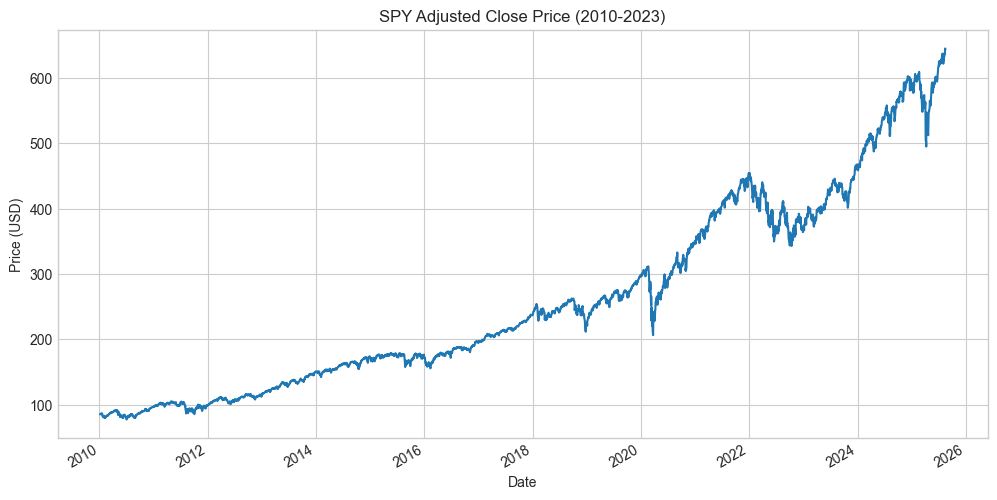

In [2]:
spy_data['SPY'].plot(figsize=(12, 6), title='SPY Adjusted Close Price (2010-2023)')
plt.ylabel('Price (USD)')
plt.show()

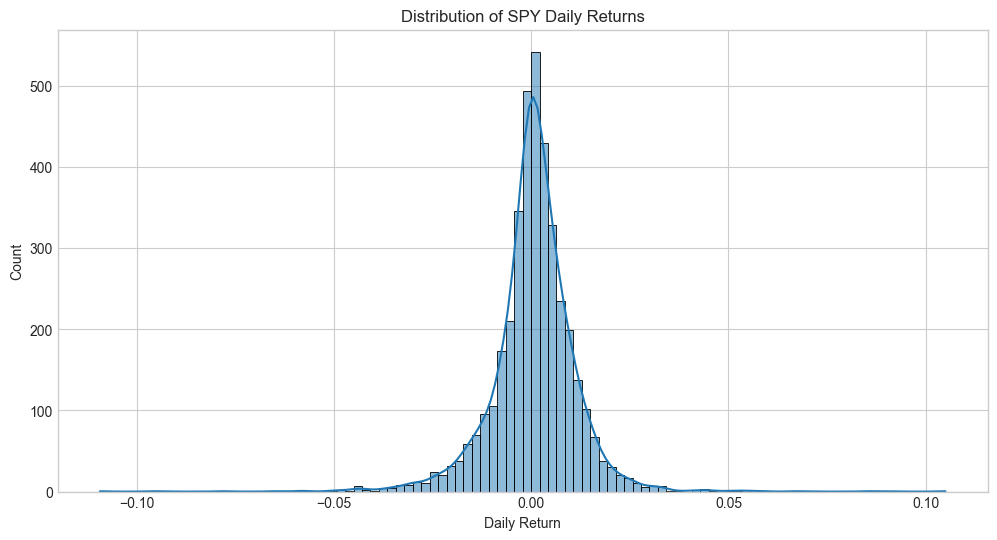

count    3928.000000
mean        0.000574
std         0.010916
min        -0.109424
25%        -0.003711
50%         0.000693
75%         0.005807
max         0.105019
Name: SPY, dtype: float64


In [3]:
spy_returns = spy_data['SPY'].pct_change().dropna()

plt.figure(figsize=(12, 6))
sns.histplot(spy_returns, bins=100, kde=True)
plt.title('Distribution of SPY Daily Returns')
plt.xlabel('Daily Return')
plt.show()

print(spy_returns.describe())

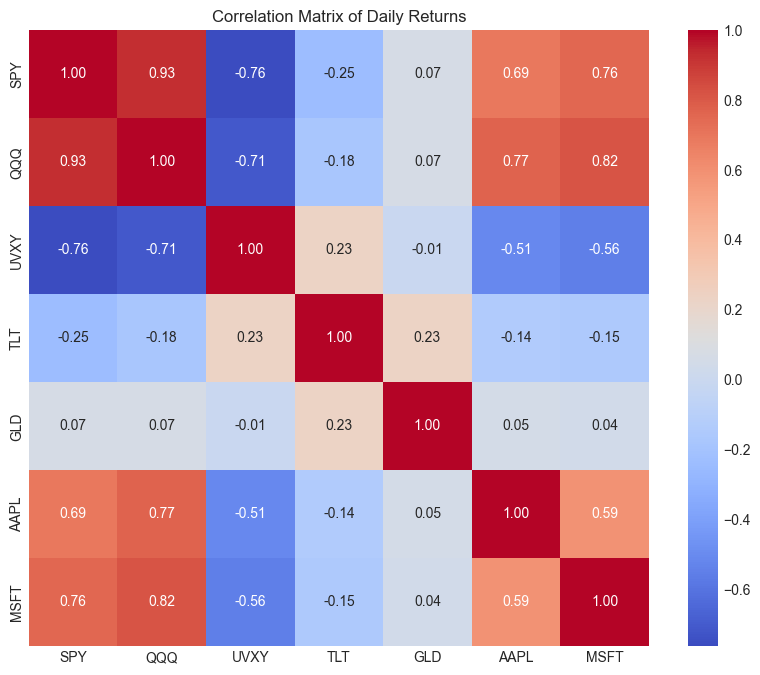

In [4]:
# Load all tickers into a single DataFrame
all_data = []
for ticker in ALL_TICKERS:
    df = pd.read_csv(f'../data/raw/{ticker}.csv', index_col='Date', parse_dates=True)
    all_data.append(df)

# Concatenate along columns
full_df = pd.concat(all_data, axis=1).dropna()

# Calculate daily returns for all assets
returns_df = full_df.pct_change().dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()